In [65]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rc("axes.spines", top=False, right=False)
sns.set_style(style='darkgrid', rc=None)
style.use('fivethirtyeight')
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)

In [66]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)

#imports raw data
df_csv = pd.read_csv('data.csv')
df_csv1 = df_csv.copy()
df_csv1.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [67]:
df_csv1.recoveries.value_counts()

recoveries
0.00       50567
16.27          3
19.20          3
9.80           3
10.92          2
           ...  
1089.14        1
947.16         1
1417.31        1
493.03         1
182.27         1
Name: count, Length: 3599, dtype: int64

In [68]:
#removes any duplicated rows
df_csv1.drop_duplicates()

#begins changing data types

#removes 'month' from term column
df_csv1["term"] = df_csv1["term"].str.replace('36 months', '36', regex=False)
df_csv1["term"] = df_csv1["term"].str.replace('60 months', '60', regex=False)

#term changes to category where set number of options available
df_csv1["term"] = pd.to_numeric(df_csv1["term"], errors='coerce')


df_csv1["employment_length"] = df_csv1["employment_length"].astype('category')
df_csv1["home_ownership"] = df_csv1["home_ownership"].astype('category')
df_csv1[["collections_12_mths_ex_med", "verification_status", "loan_status", "purpose", "policy_code",
         "application_type", "payment_plan"]] = df_csv1[["collections_12_mths_ex_med", "verification_status", "loan_status", "purpose", "policy_code", "application_type", "payment_plan"]].astype('category')

#changes dates to datetime category
df_csv1["issue_date"] = pd.to_datetime(df_csv1["issue_date"], format = '%b-%Y')
df_csv1["earliest_credit_line"] = pd.to_datetime(df_csv1["earliest_credit_line"], format = '%b-%Y')
df_csv1["last_payment_date"] = pd.to_datetime(df_csv1["last_payment_date"], format = '%b-%Y')
df_csv1["next_payment_date"] = pd.to_datetime(df_csv1["next_payment_date"], format = '%b-%Y')
df_csv1["last_credit_pull_date"] = pd.to_datetime(df_csv1["last_credit_pull_date"], format = '%b-%Y')

In [69]:
#checks data types have been changed
df_csv1.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  object        
 9   sub_grade                    54231 non-null  object        
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

Task 3: remove/imput missing values from the dataframe

In [70]:
#calculates percentage of missing values
(1 - df_csv1.count() / len(df_csv1)) *100

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_accounts   

In [71]:
#drops columns with large number of missing values
df_csv1 = df_csv1.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog'], axis=1)

In [72]:
#replaces null values in term with the mode (given categorical with only two categories)
df_csv1["term"] = df_csv1["term"].fillna(df_csv1["term"].mode().iloc[0])

In [73]:
df_csv1["last_payment_date"].value_counts()

last_payment_date
2022-01-01    15569
2021-12-01     5040
2020-12-01     1023
2020-10-01     1020
2021-07-01     1013
              ...  
2014-04-01       10
2014-03-01        8
2014-02-01        3
2014-01-01        3
2013-12-01        1
Name: count, Length: 98, dtype: int64

In [74]:
print(f"The mode of the distribution is {df_csv1['last_payment_date'].mode()[0]}")
print(f"The mean of the distribution is {df_csv1['last_payment_date'].mean()}")
print(f"The median of the distribution is {df_csv1['last_payment_date'].median()}")

The mode of the distribution is 2022-01-01 00:00:00
The mean of the distribution is 2020-08-23 00:21:38.600391680
The median of the distribution is 2021-04-01 00:00:00


In [75]:
#replaces null values in last_payment_date with median
df_csv1["last_payment_date"] = df_csv1["last_payment_date"].fillna(df_csv1["last_payment_date"].median())

In [76]:
df_csv1["last_credit_pull_date"].value_counts()

last_credit_pull_date
2022-01-01    32136
2021-12-01     1458
2021-11-01      909
2021-10-01      875
2021-09-01      849
              ...  
2013-11-01        1
2013-10-01        1
2013-07-01        1
2014-05-01        1
2014-02-01        1
Name: count, Length: 101, dtype: int64

In [77]:
print(f"The mode of the distribution is {df_csv1['last_credit_pull_date'].mode()[0]}")
print(f"The mean of the distribution is {df_csv1['last_credit_pull_date'].mean()}")
print(f"The median of the distribution is {df_csv1['last_credit_pull_date'].median()}")

The mode of the distribution is 2022-01-01 00:00:00
The mean of the distribution is 2021-04-15 16:16:28.964296192
The median of the distribution is 2022-01-01 00:00:00


In [78]:
#replaces null values in last_credit_pull_date with the mode (which is also the median)
df_csv1["last_credit_pull_date"] = df_csv1["last_credit_pull_date"].fillna(df_csv1["last_credit_pull_date"].mode().iloc[0])

C:\Users\danie\AppData\Local\Temp\ipykernel_13536\3493535214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dpd=sns.barplot(y=probs.values, x=probs.index,palette=five_thirty_eight)
C:\Users\danie\AppData\Local\Temp\ipykernel_13536\3493535214.py:4: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  dpd=sns.barplot(y=probs.values, x=probs.index,palette=five_thirty_eight)


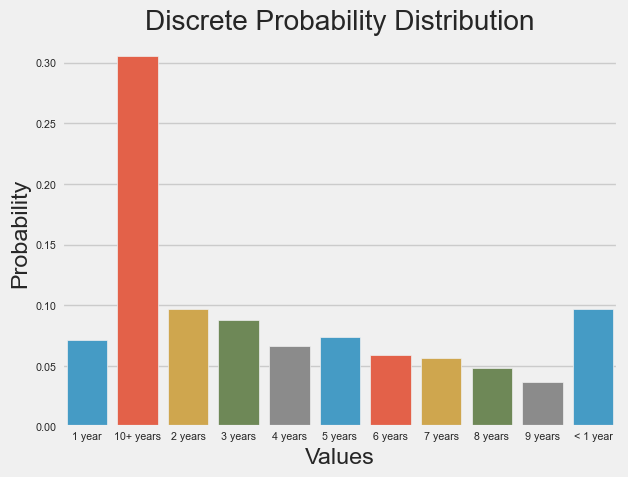

The mode of the distribution is 10+ years


In [79]:
probs = df_csv1['employment_length'].value_counts(normalize=True)

# Create bar plot
dpd=sns.barplot(y=probs.values, x=probs.index,palette=five_thirty_eight)

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution')
plt.show()
print(f"The mode of the distribution is {df_csv1['employment_length'].mode()[0]}")


In [80]:
#replaces null values in employment_length with the mode
df_csv1["employment_length"] = df_csv1["employment_length"].fillna(df_csv1["employment_length"].mode().iloc[0])


In [81]:
#funded_amount appears colinear with loan_amount, below we can check this
import statsmodels.formula.api as smf

## Fit a linear regression model to try and predict study_hrs from marks and IQ
model0 = smf.ols("funded_amount ~ loan_amount", df_csv).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          funded_amount   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.192e+06
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:34:12   Log-Likelihood:            -4.2004e+05
No. Observations:               51224   AIC:                         8.401e+05
Df Residuals:                   51222   BIC:                         8.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      73.0246      7.513      9.720      0.000      58.299      87.750
loan_amount     0.9867      0.000   2047.494      0.000       0.986       0.988
==============================================================================
Omnibus:                    78895.750   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30744020.846
Skew:                          -9.985   Prob(JB):                         0.00
Kurtosis:                     121.346   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above provides evidence that funded_amount and loan_amount are strongly co-linear, therefore it is appropriate to drop the funded_amount column

In [82]:
df_csv1 = df_csv1.drop(['funded_amount'], axis=1)

The mode of the distribution is 11.99
The mean of the distribution is 13.507328482328484
The median of the distribution is 13.16


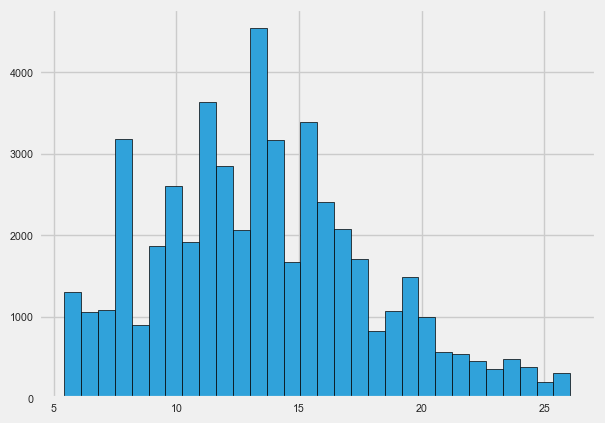

In [83]:

import math
from scipy.stats import shapiro
from scipy.stats import lognorm
import matplotlib.pyplot as plt

interest_rate = df_csv1["int_rate"]
plt.hist(interest_rate, edgecolor='black', bins=30)
print(f"The mode of the distribution is {df_csv1['int_rate'].mode()[0]}")
print(f"The mean of the distribution is {df_csv1['int_rate'].mean()}")
print(f"The median of the distribution is {df_csv1['int_rate'].median()}")

In [84]:
#replaces null values in int_rate with median
df_csv1["int_rate"] = df_csv1["int_rate"].fillna(df_csv1["int_rate"].median())

In [85]:
df_csv1["collections_12_mths_ex_med"].value_counts()

collections_12_mths_ex_med
0.0    53971
1.0      193
2.0       14
3.0        1
4.0        1
Name: count, dtype: int64

In [86]:
#replaces null values in collections_12_mths_ex_med with the mode as it is much more frequent than the other values
df_csv1["collections_12_mths_ex_med"] = df_csv1["collections_12_mths_ex_med"].fillna(df_csv1["collections_12_mths_ex_med"].mode().iloc[0])

In [87]:
#replaces null values in collections_12_mths_ex_med with median(also the mode)
df_csv1["collections_12_mths_ex_med"] = df_csv1["collections_12_mths_ex_med"].fillna(df_csv1["collections_12_mths_ex_med"].mode().iloc[0])

In [88]:
#checks missing values have been replaced
(1 - df_csv1.count() / len(df_csv1)) *100

id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late

<Axes: >

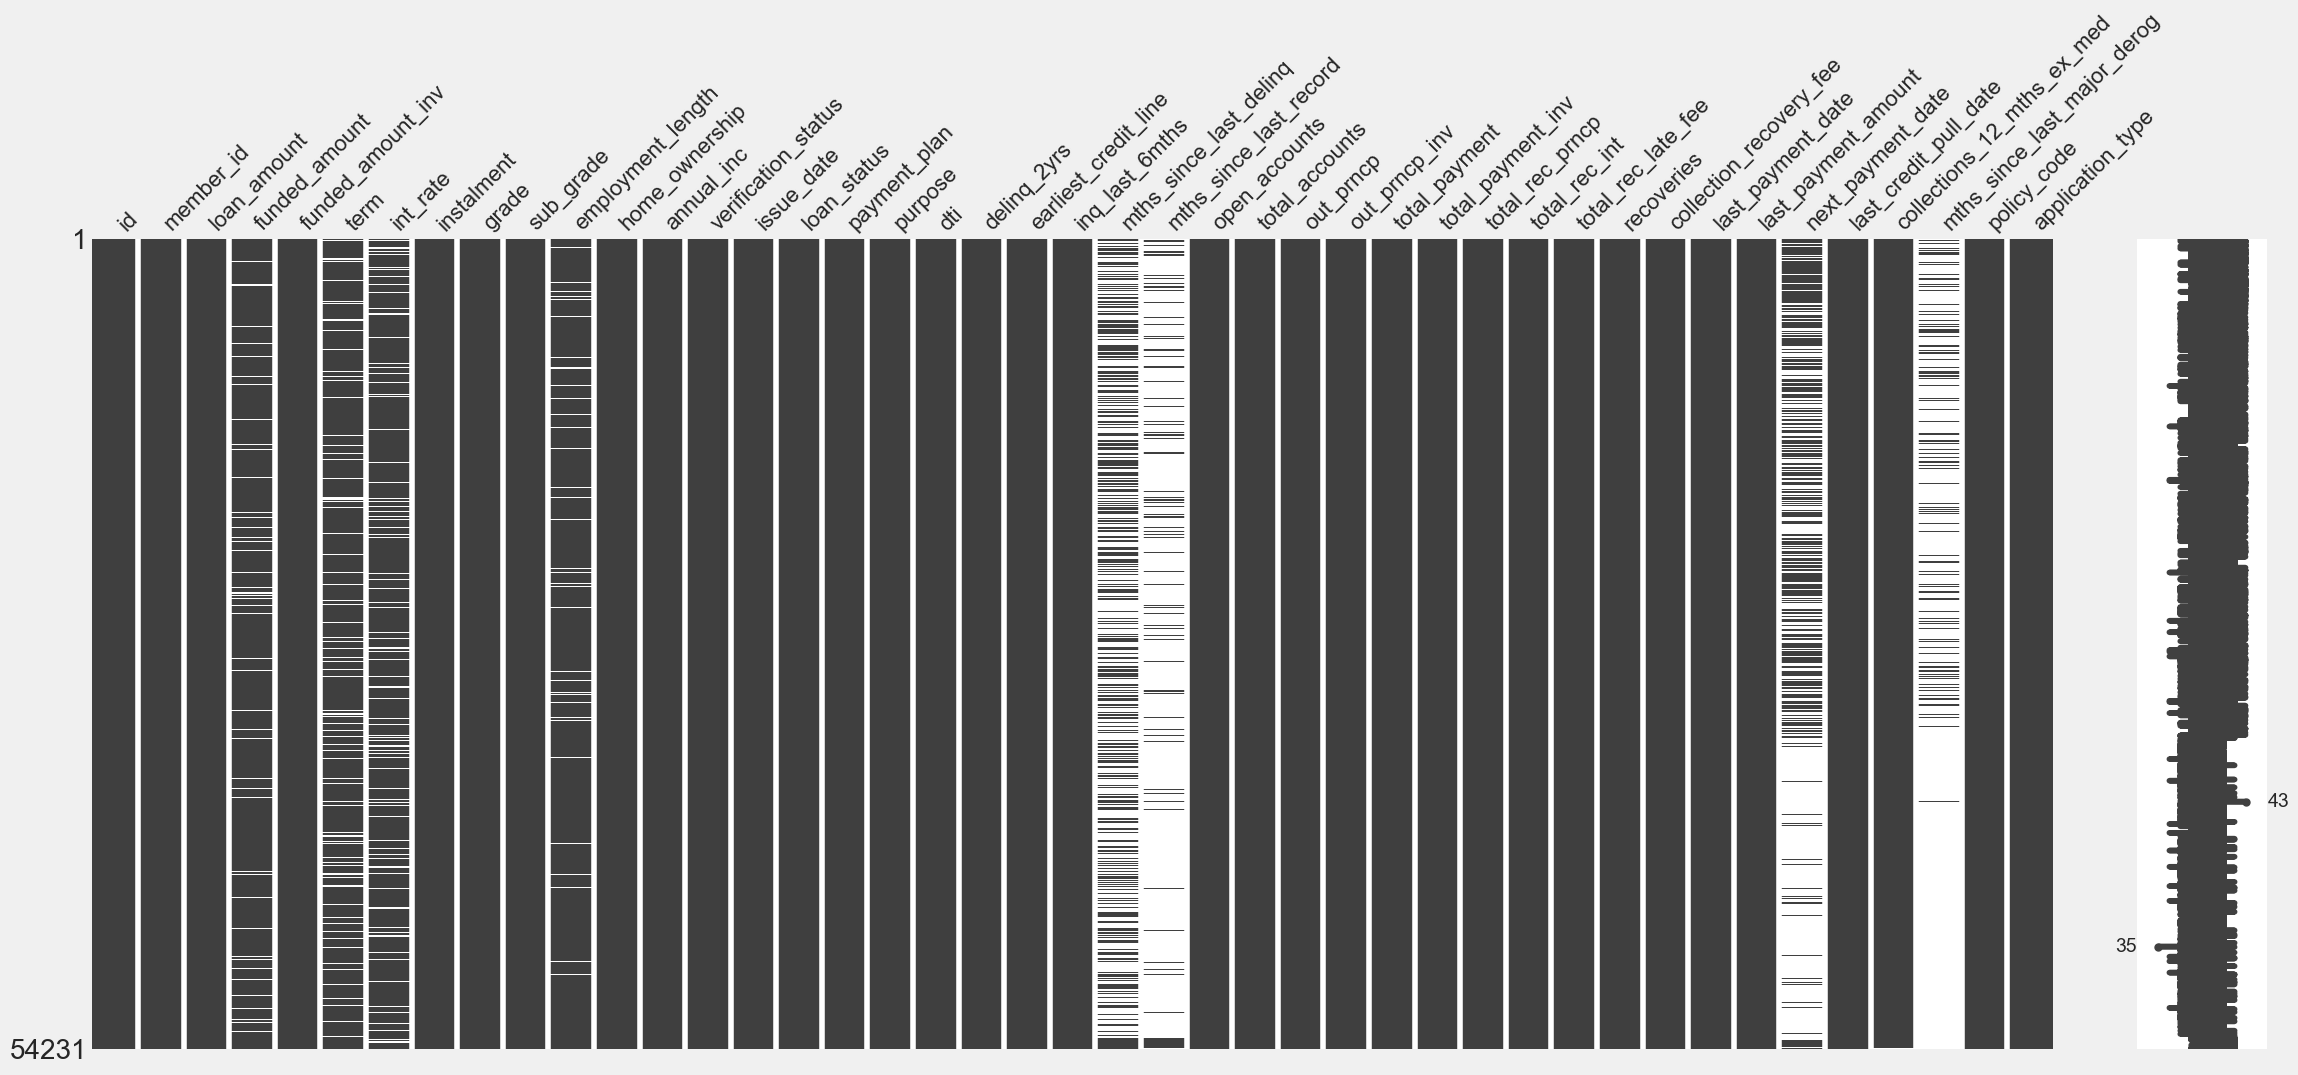

In [89]:
import missingno as msno

msno.matrix(df_csv)


<Axes: >

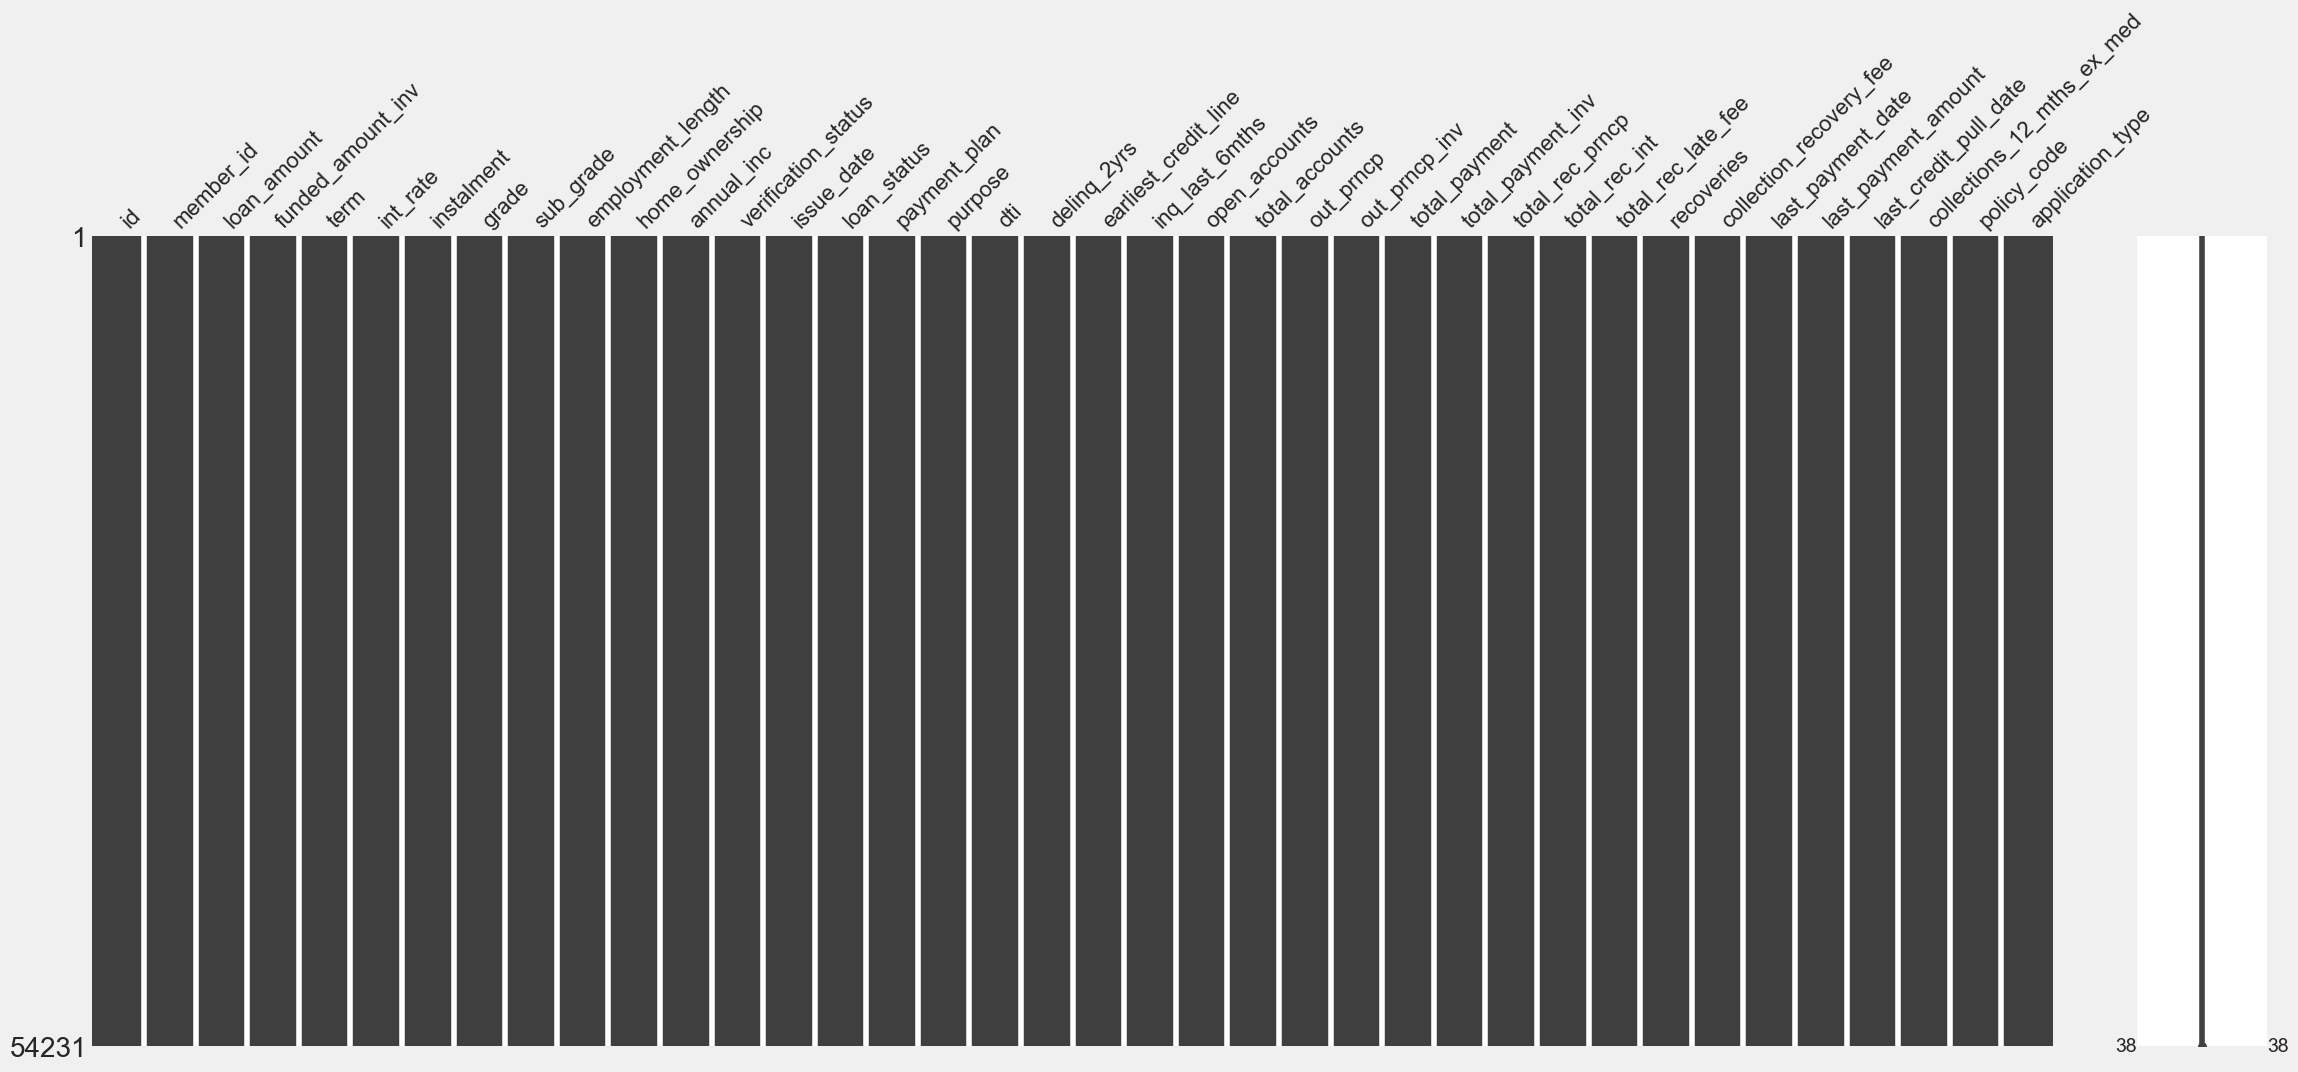

In [90]:
msno.matrix(df_csv1)

Performing transformations on skewed data

['id', 'member_id', 'funded_amount_inv', 'term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'earliest_credit_line', 'last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'application_type']


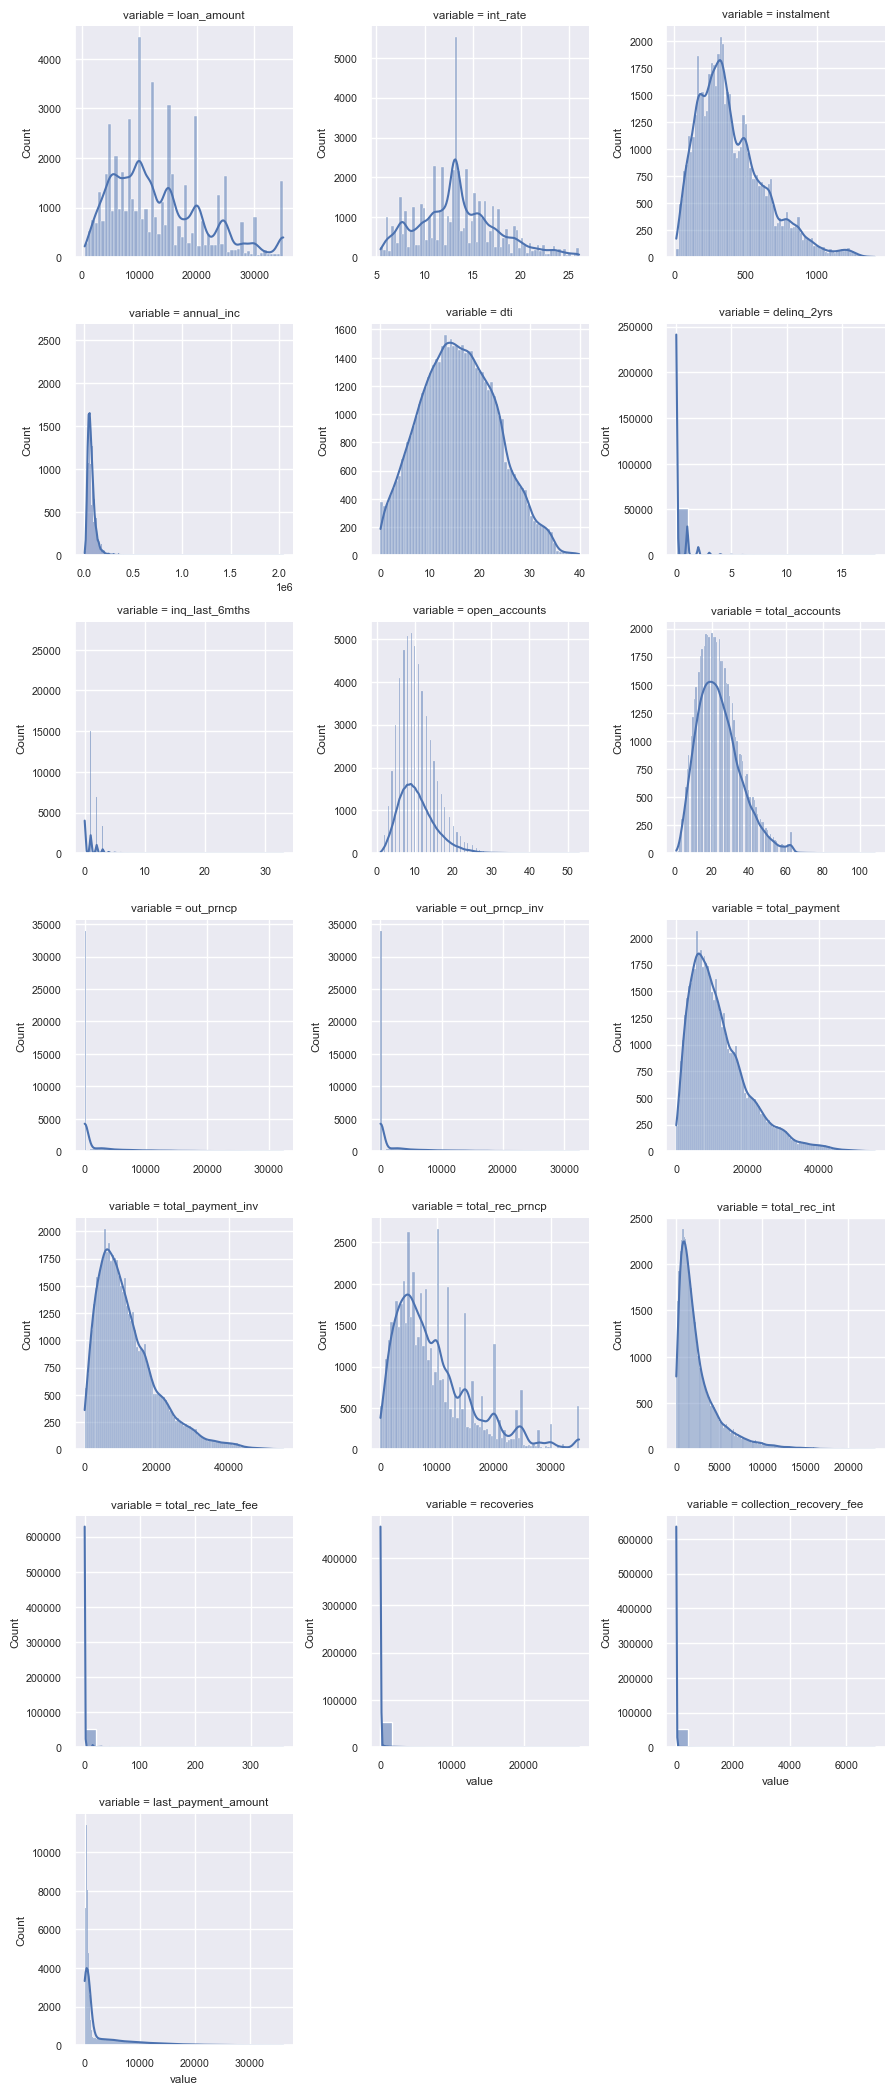

In [91]:
numeric_features = ['loan_amount', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 
                    'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 
                    'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                     'recoveries', 'collection_recovery_fee', 'last_payment_amount', 
                      ]

categorical_features = [col for col in df_csv1.columns if col not in numeric_features]
sns.set(font_scale=0.7)
f = pd.melt(df_csv1, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

print(categorical_features)

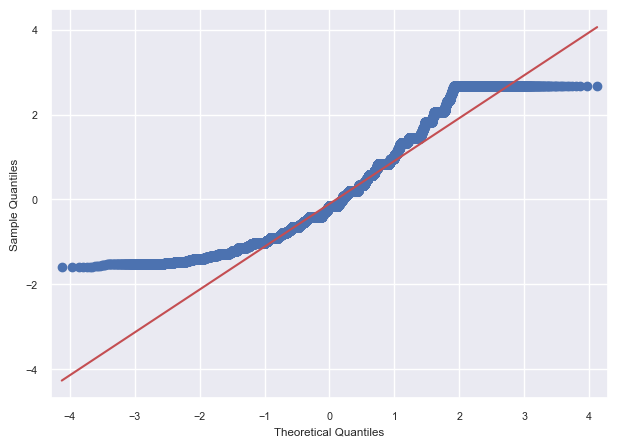

count    54231.000000
mean     13333.076100
std       8082.196709
min        500.000000
25%       7000.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [92]:
from statsmodels.graphics.gofplots import qqplot


qq_plot = qqplot(df_csv1['loan_amount'] , scale=1 ,line='q', fit=True)
plt.show()
df_csv1['loan_amount'].describe()

In [93]:
for i in numeric_features:
    print(i)
    print(df_csv1[i].skew())

loan_amount
0.8052592257800115
int_rate
0.45651514244548674
instalment
0.9969813991920319
annual_inc
8.711831033809583
dti
0.18941964982496076
delinq_2yrs
5.370001885877136
inq_last_6mths
3.248918364007299
open_accounts
1.0592820053165104
total_accounts
0.7790139244121327
out_prncp
2.356426188671512
out_prncp_inv
2.3568475131007687
total_payment
1.267890957776937
total_payment_inv
1.256196603509513
total_rec_prncp
1.2610146774673532
total_rec_int
2.204322035306792
total_rec_late_fee
13.184304523859357
recoveries
14.58979334668037
collection_recovery_fee
27.63684310809756
last_payment_amount
2.4993811438984834


I will take a skew of <0.5 as acceptable, as anything above this is considered moderately or highly skewed.
Given all variables are positively skewed, they can undergo a log transformation as below to improve their skewness.

In [102]:
for i in numeric_features:
    if df_csv1[i].skew() >= 0.5:
        df_csv1[i] = df_csv1[i].map(lambda x: np.log(x) if x > 0 else 0)

In [103]:
for i in numeric_features:
    print(i)
    print(df_csv1[i].skew())

loan_amount
-0.6774872814309607
int_rate
0.45651514244548674
instalment
-0.6678200052504661
annual_inc
0.13777429864614651
dti
0.18941964982496076
delinq_2yrs
-0.7809858285031449
inq_last_6mths
-0.0017456101889677755
open_accounts
-0.4713546406771721
total_accounts
-0.677151962237189
out_prncp
0.5358866025076904
out_prncp_inv
0.5359098791286038
total_payment
-1.2846750362486437
total_payment_inv
-2.919662356090844
total_rec_prncp
-1.8842755711300243
total_rec_int
-0.9288852798821945
total_rec_late_fee
5.44741477093973
recoveries
3.6090204292333694
collection_recovery_fee
3.571674039656225
last_payment_amount
0.053386930306881276


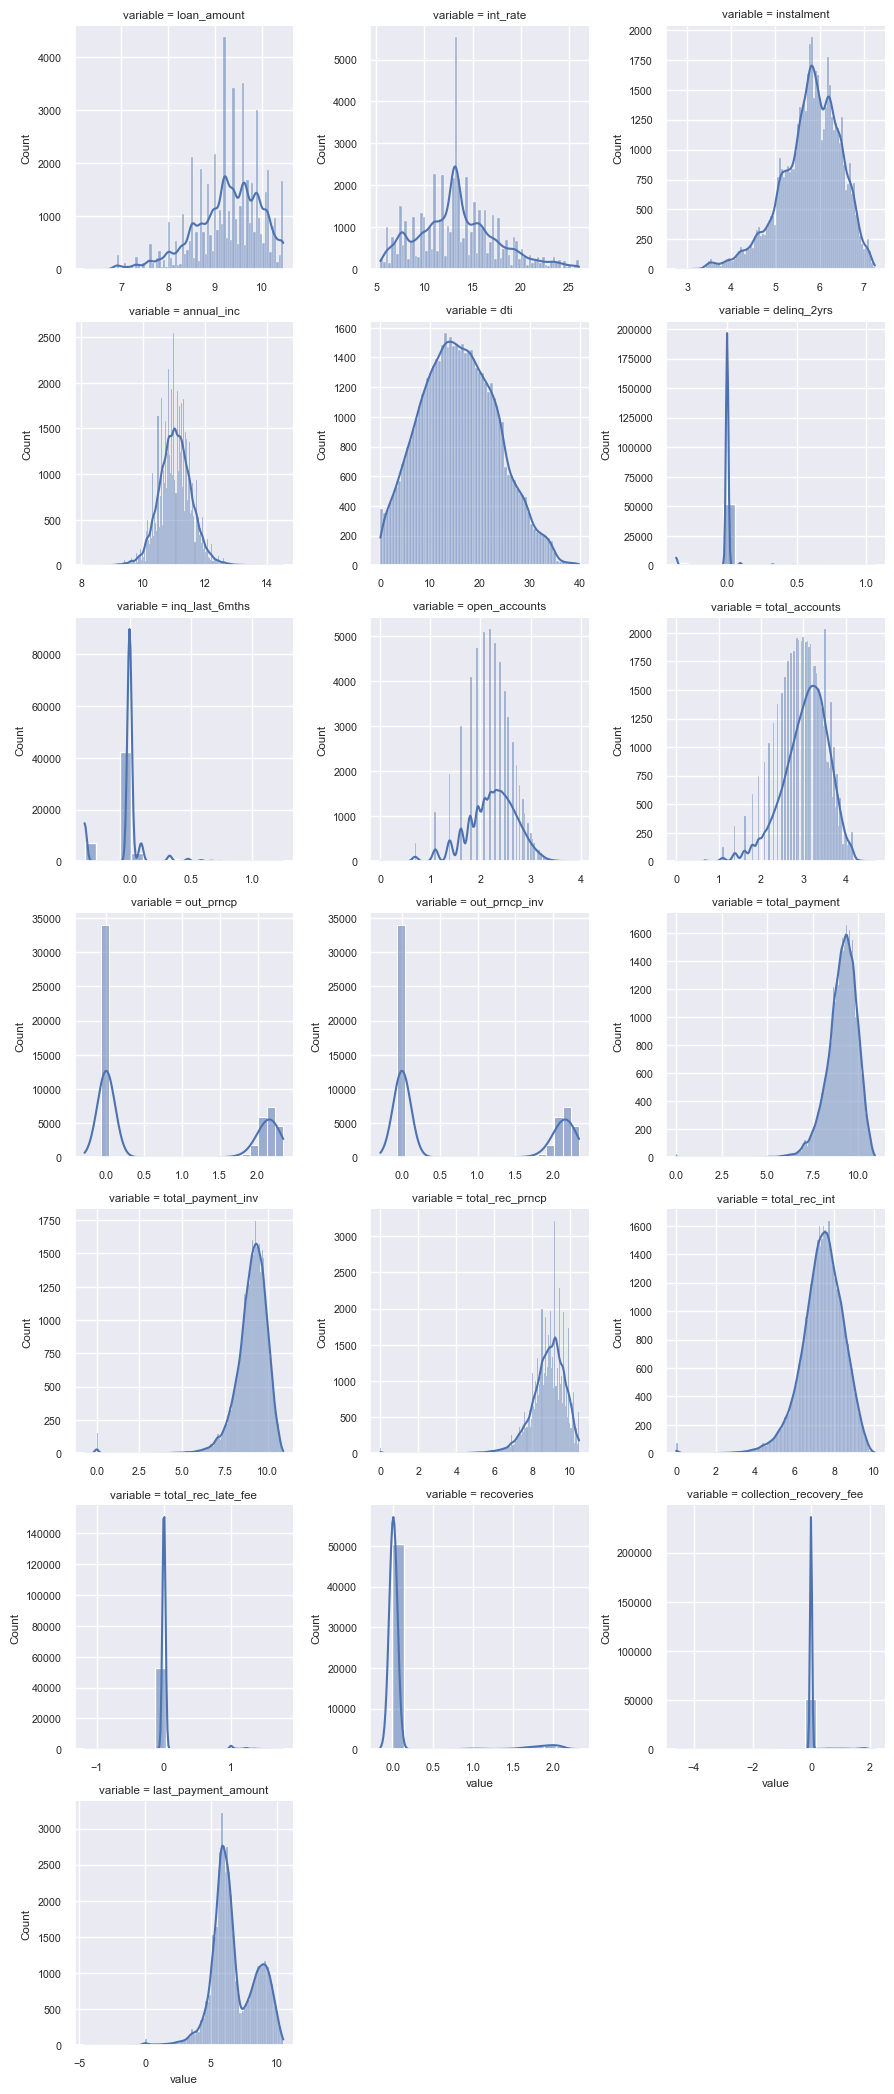

In [104]:
#now to visualise the data following the log transformations

sns.set(font_scale=0.7)
f = pd.melt(df_csv1, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

In [105]:
df_csv2 = df_csv1.copy()

Colinearity 

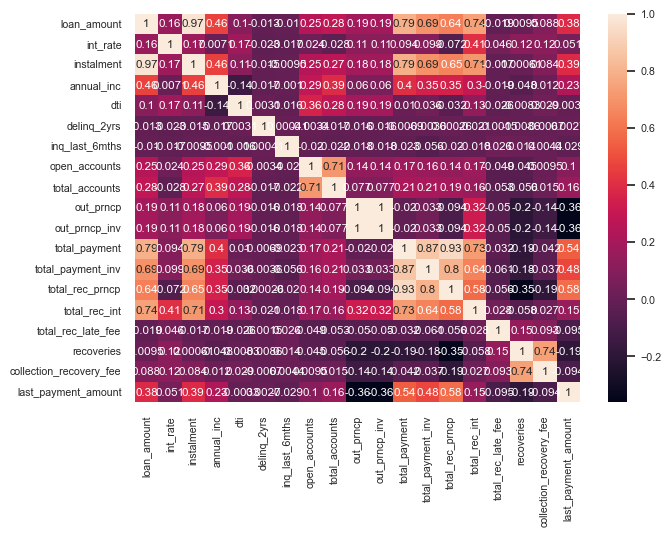

In [106]:
corr_matrix = df_csv2[numeric_features].corr()
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

Taking 0.9 as a cut off for colinearity, we see the following are strongly co-linear:
loan_amount and instalment (0.95)
total_payment and total_rec_prncp (0.93)

We can therefore drop installment and totel_rec_prncp, however I returned to this to incude instalment as it is useful for the next milestone in the project

In [107]:
df_csv2 = df_csv2.drop(['total_rec_prncp'], axis=1)


In [108]:
df_csv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  float64       
 3   funded_amount_inv           54231 non-null  float64       
 4   term                        54231 non-null  float64       
 5   int_rate                    54231 non-null  float64       
 6   instalment                  54231 non-null  float64       
 7   grade                       54231 non-null  object        
 8   sub_grade                   54231 non-null  object        
 9   employment_length           54231 non-null  category      
 10  home_ownership              54231 non-null  category      
 11  annual_inc                  54231 non-null  float64   

In [111]:
df_csv2.to_csv('data_post_EDA.csv', index=False)